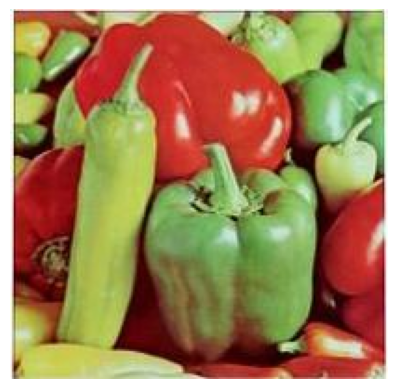

In [122]:
from tool import *

"""Segmenting red color in RGB space from image ‘peppers.jpg’.
Output segmented images in R,G,B, and final image, respectively
"""

# 读入图像
img = imread("4_peppers.jpg")


def segmentColor(img, color: tuple, error: float):
    """传入 OpenCV 图像和颜色 RGB 值"""

    # 创建三信道的灰度图像用作后景
    img_gray_single = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = np.stack([img_gray_single] * 3, axis=2)
    imshow(img_gray, 0)

    # 颜色值 RGB -> BRG
    color_brg = np.array(list(reversed(color)))
    print(
        f"""Segmenting Color (RGB): {color}
Color (BRG): {color_brg}"""
    )

    # 获得符合条件的像素矩阵
    diff_vals = np.sqrt(np.sum((img - color_brg) ** 2, axis=2))
    satisfied_pixels = diff_vals < error

    print(
        f"""Diff Vals:
Min: {diff_vals.min()}
Mean: {diff_vals.mean()}
Max: {diff_vals.max()}
Error: {error}"""
    )

    # 得到展示图像
    res_img = img_gray.copy()
    res_img[satisfied_pixels] = img[satisfied_pixels]
    # print(img[satisfied_pixels])

    imshow(res_img)
    return res_img


# 确定要提取的颜色
red = (197, 59, 46)
green = (91, 151, 63)
blue = (0, 0, 255)

imshow(img)

Segmenting Red
Segmenting Color (RGB): (197, 59, 46)
Color (BRG): [ 46  59 197]
Diff Vals:
Min: 0.0
Mean: 112.56811356770984
Max: 291.756747993941
Error: 85


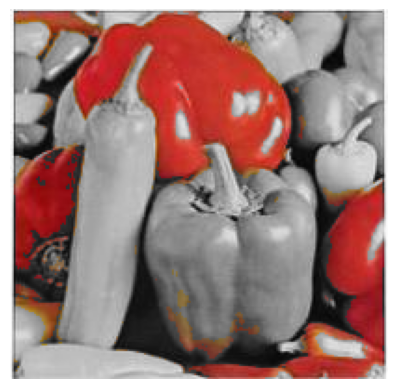

In [123]:
print("Segmenting Red")
imshow(segmentColor(img, red, error=85))

Segmenting Green
Segmenting Color (RGB): (91, 151, 63)
Color (BRG): [ 63 151  91]
Diff Vals:
Min: 1.7320508075688772
Mean: 110.5863229621834
Max: 272.70680226206315
Error: 60


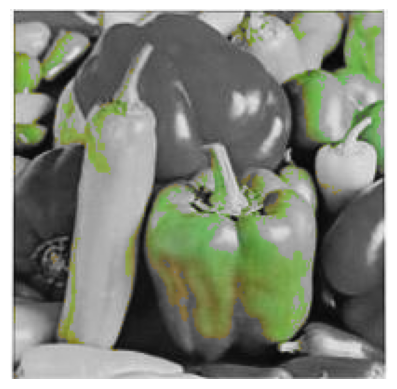

In [124]:
print("Segmenting Green")
imshow(segmentColor(img, green, error=60))

Segmenting Blue
Segmenting Color (RGB): (0, 0, 255)
Color (BRG): [255   0   0]
Diff Vals:
Min: 219.3855054464629
Mean: 282.28021732927687
Max: 362.4168870237699
Error: 100


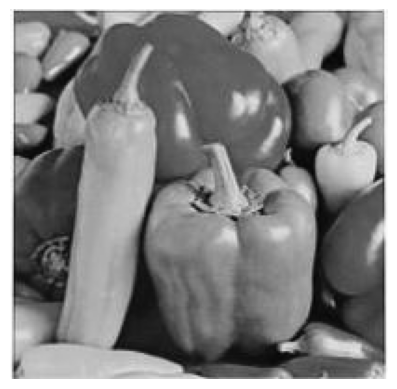

In [125]:
print("Segmenting Blue")
imshow(segmentColor(img, blue, error=100))